In [4]:
pip install pandas sqlalchemy sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


## ** Processing TikTok data **

In [5]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer  = nltk.SnowballStemmer("english")
data = pd.read_csv('/content/drive/MyDrive/tiktok_google_play_reviews.csv')
print(data.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

<ipython-input-5-4256fe2fe195>:10: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/tiktok_google_play_reviews.csv')


In [6]:
df = pd.read_csv('/content/drive/MyDrive/tiktok_google_play_reviews.csv')

data = data[["content", "score"]]
print(data.head())

<ipython-input-6-f3088d657549>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/tiktok_google_play_reviews.csv')


                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


In [7]:
print(data.isnull().sum())

content    31
score       0
dtype: int64


In [8]:
data = data.dropna()

In [9]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)


In [10]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5,
             title="Proportion of Ratings")
figure.show()

In [11]:
import matplotlib.pyplot as plt

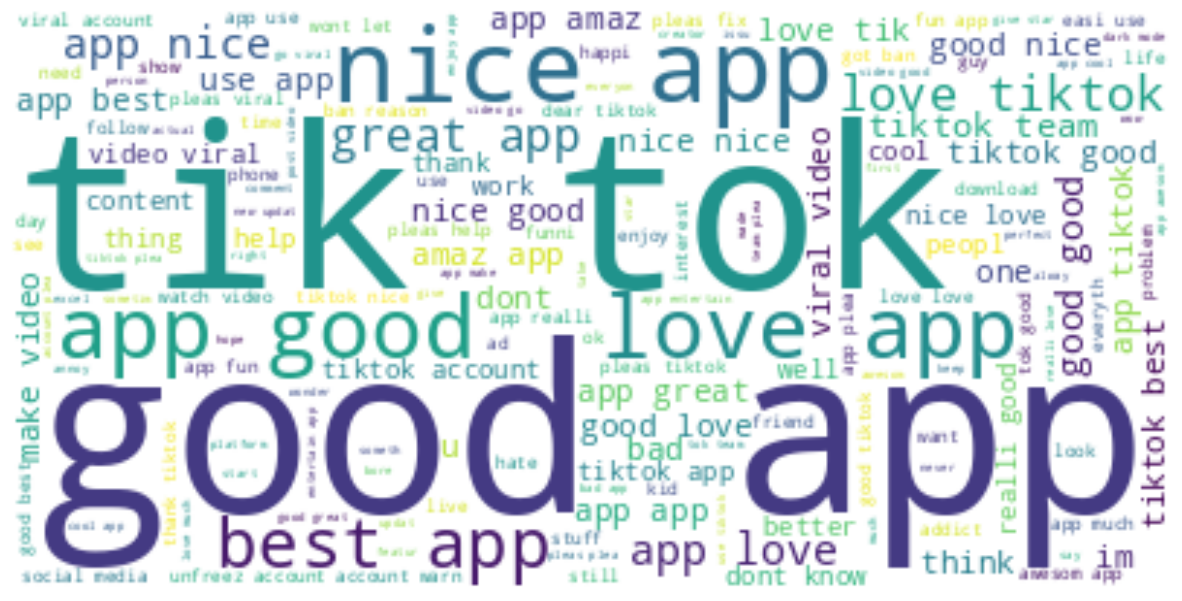

In [12]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  score  Positive  \
0                                               word      5     0.000   
1                                  great fun app far      5     0.787   
2  app would get higher rate liter cant sign seco...      1     0.000   
3             wish could give  percent rate love 💕 😘      5     0.633   
4                                      pictur record      5     0.000   

   Negative  Neutral  
0      0.00    1.000  
1      0.00    0.213  
2      0.07    0.930  
3      0.00    0.367  
4      0.00    1.000  


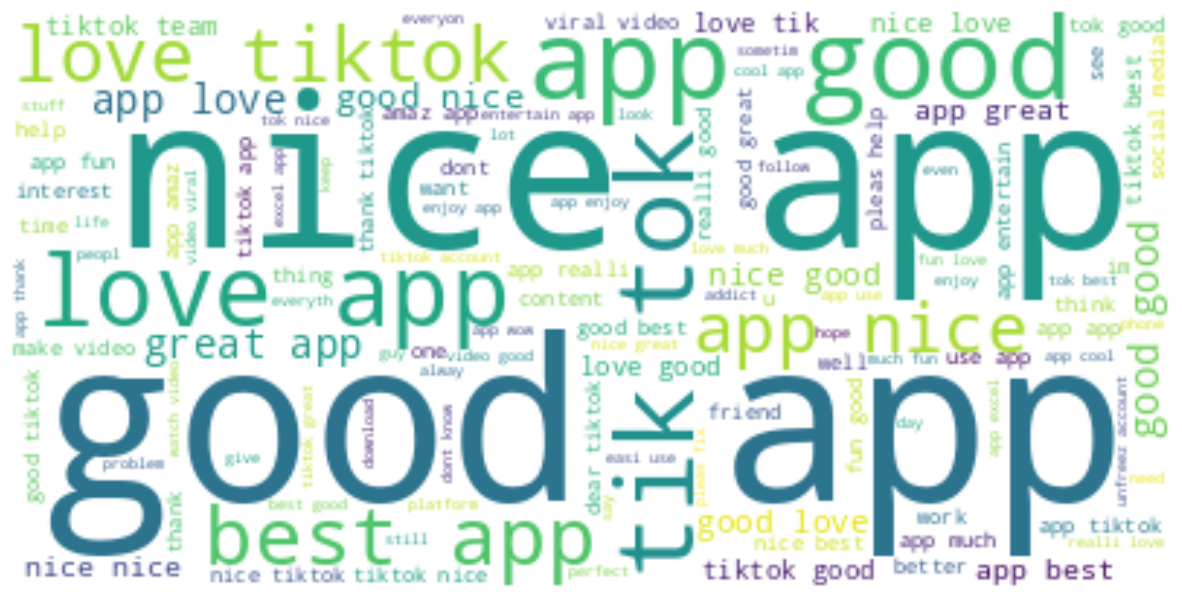

In [14]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

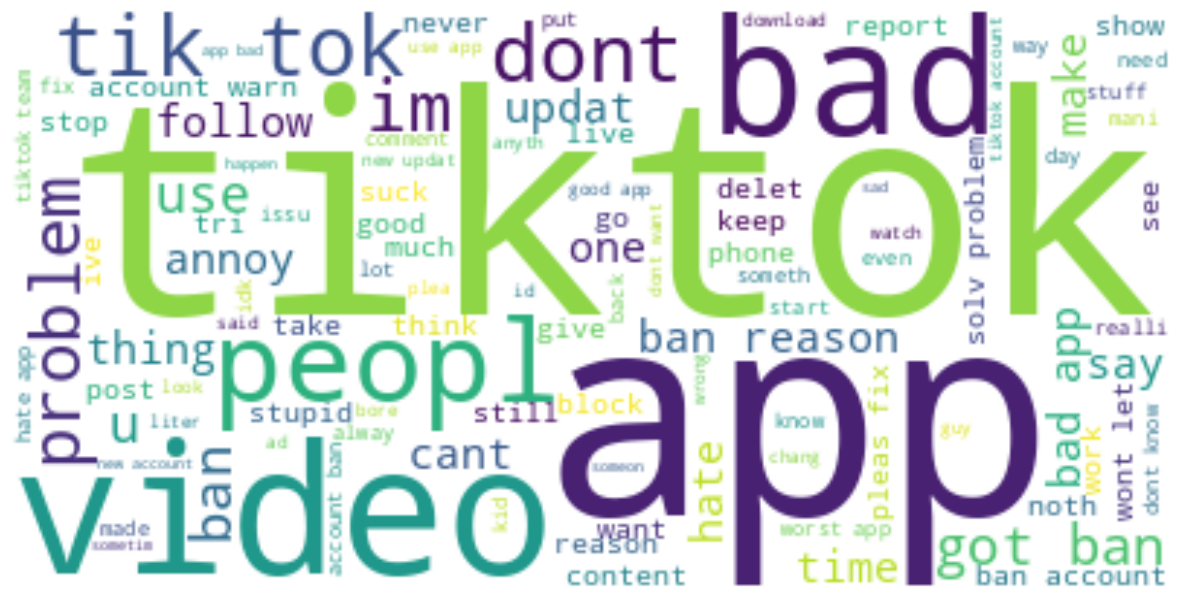

In [15]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***SQL Queries on tiktok data***

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-32-4605bccf9533>:32: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



Perfect Reviews:
                                       content  score  Positive  Negative  \
0                                         word      5     0.000     0.000   
1                            great fun app far      5     0.787     0.000   
2       wish could give  percent rate love 💕 😘      5     0.633     0.000   
3                                pictur record      5     0.000     0.000   
4                                love amaz app      5     0.677     0.000   
...                                        ...    ...       ...       ...   
338867                                    love      5     1.000     0.000   
338868                                      😍😍      5     0.000     0.000   
338869                                    nice      5     1.000     0.000   
338870                         tiktok love sad      5     0.506     0.373   
338871                               good use       5     0.744     0.000   

        Neutral  
0         1.000  
1         0.213  
2   

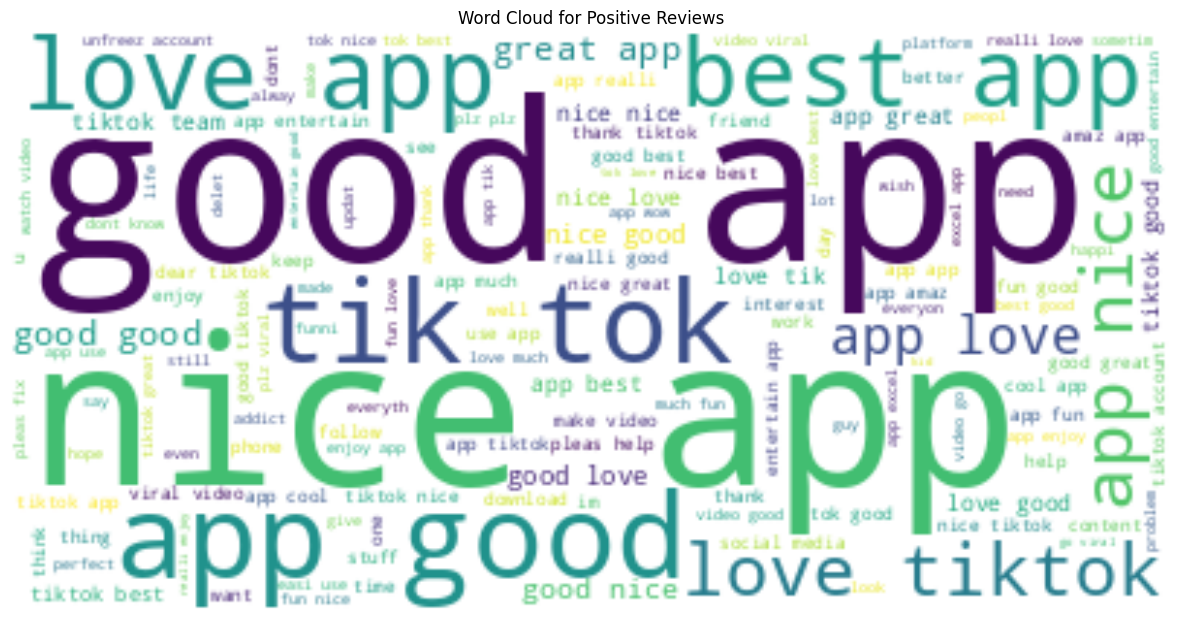

Overall Sentiment Statistics:
   AvgPositive  AvgNegative  AvgNeutral
0     0.434042     0.037906    0.509645


In [32]:
import pandas as pd
import sqlite3
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import re

# Download required nltk resources
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Define cleaning function
stemmer = nltk.SnowballStemmer("english")
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    return " ".join(text)

# Load TikTok data
data = pd.read_csv('/content/drive/MyDrive/tiktok_google_play_reviews.csv')
data = data[["content", "score"]].dropna()
data["content"] = data["content"].apply(clean)

# Perform sentiment analysis
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = data["content"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
data["Negative"] = data["content"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
data["Neutral"] = data["content"].apply(lambda x: sentiments.polarity_scores(x)["neu"])

# Connect to SQLite database
conn = sqlite3.connect("reviews.db")

# Save data to SQLite
data.to_sql("tiktok_reviews", conn, if_exists="replace", index=False)

# SQL Query 1: Select all perfect reviews (score = 5)
sql_query_perfect = "SELECT * FROM tiktok_reviews WHERE score = 5"
perfect_reviews = pd.read_sql_query(sql_query_perfect, conn)
print("Perfect Reviews:")
print(perfect_reviews)

# SQL Query 2: Identify most common scores
sql_query_score_distribution = """
SELECT score, COUNT(*) AS count
FROM tiktok_reviews
GROUP BY score
ORDER BY count DESC
"""
score_distribution = pd.read_sql_query(sql_query_score_distribution, conn)
print("Score Distribution:")
print(score_distribution)

# SQL Query 3: Calculate the average sentiment scores for each score level
sql_query_avg_sentiments = """
SELECT score, AVG(Positive) AS AvgPositive, AVG(Negative) AS AvgNegative, AVG(Neutral) AS AvgNeutral
FROM tiktok_reviews
GROUP BY score
"""
avg_sentiments = pd.read_sql_query(sql_query_avg_sentiments, conn)
print("Average Sentiments by Score:")
print(avg_sentiments)

# SQL Query 4: Find reviews with conflicting sentiments (e.g., Positive > 0.5 and Negative > 0.5)
sql_query_conflicting = """
SELECT content, score, Positive, Negative
FROM tiktok_reviews
WHERE Positive > 0.5 AND Negative > 0.5
"""
conflicting_reviews = pd.read_sql_query(sql_query_conflicting, conn)
print("Conflicting Sentiments:")
print(conflicting_reviews)

# SQL Query 5: Extract long reviews (e.g., more than 100 characters)
sql_query_long_reviews = """
SELECT content, score, LENGTH(content) AS length
FROM tiktok_reviews
WHERE LENGTH(content) > 100
"""
long_reviews = pd.read_sql_query(sql_query_long_reviews, conn)
print("Long Reviews:")
print(long_reviews)

# SQL Query 6: Aggregate sentiment scores by review length categories
sql_query_length_sentiments = """
SELECT
    CASE
        WHEN LENGTH(content) < 50 THEN 'Short'
        WHEN LENGTH(content) BETWEEN 50 AND 150 THEN 'Medium'
        ELSE 'Long'
    END AS LengthCategory,
    AVG(Positive) AS AvgPositive,
    AVG(Negative) AS AvgNegative,
    AVG(Neutral) AS AvgNeutral
FROM tiktok_reviews
GROUP BY LengthCategory
"""
length_sentiments = pd.read_sql_query(sql_query_length_sentiments, conn)
print("Sentiments by Length Category:")
print(length_sentiments)

# Generate word cloud for positive reviews
positive_text = " ".join(review for review in data["content"][data["Positive"] > data["Negative"]])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positive_text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Aggregate sentiment statistics
summary_query = """
SELECT AVG(Positive) AS AvgPositive, AVG(Negative) AS AvgNegative, AVG(Neutral) AS AvgNeutral
FROM tiktok_reviews
"""
summary_stats = pd.read_sql_query(summary_query, conn)
print("Overall Sentiment Statistics:")
print(summary_stats)

# Close the SQLite connection
conn.close()


# **Processing Instagram data **

In [16]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer  = nltk.SnowballStemmer("english")
data = pd.read_csv('/content/appstore_instagram_reviews_anonymized.csv')
print(data.head())


       appId country                       date           id  score  \
0  389801252      DE  2024-03-20T22:37:03-07:00  11067766035      1   
1  389801252      DE  2024-03-20T22:17:05-07:00  11067726970      4   
2  389801252      DE  2024-03-20T16:08:40-07:00  11066866484      1   
3  389801252      DE  2024-03-20T15:54:39-07:00  11066832683      1   
4  389801252      DE  2024-03-20T14:59:23-07:00  11066699753      1   

                                                text  \
0  When I want to share any stories, posts or ree...   
1  I have been using the app for a week now. I ca...   
2  Instagram, was ist nur mit euch los? Es ist fr...   
3  Die neue Schriftart ist so unglaublich hÃ¤sslich.   
4                     Null zufrieden darum gelÃ¶scht   

                                               title  \
0                     List of friends in weird order   
1                                    Great companion   
2   #Instagram #Fehler #Verbesserung dringend nÃ¶tig   
3           

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df = pd.read_csv('/content/appstore_instagram_reviews_anonymized.csv')

data = data[["title", "score"]]
print(data.head())

                                               title  score
0                     List of friends in weird order      1
1                                    Great companion      4
2   #Instagram #Fehler #Verbesserung dringend nÃ¶tig      1
3                                  HÃ¤ssliche Layout      1
4  Instagram absoluter MÃ¼ll geworden sorry aber ...      1


In [18]:
print(data.isnull().sum())

title    0
score    0
dtype: int64


In [19]:
data = data.dropna()

In [20]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["title"] = data["title"].apply(clean)


In [21]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=numbers,hole = 0.5,
             title="Proportion of Ratings")
figure.show()

In [22]:
import matplotlib.pyplot as plt

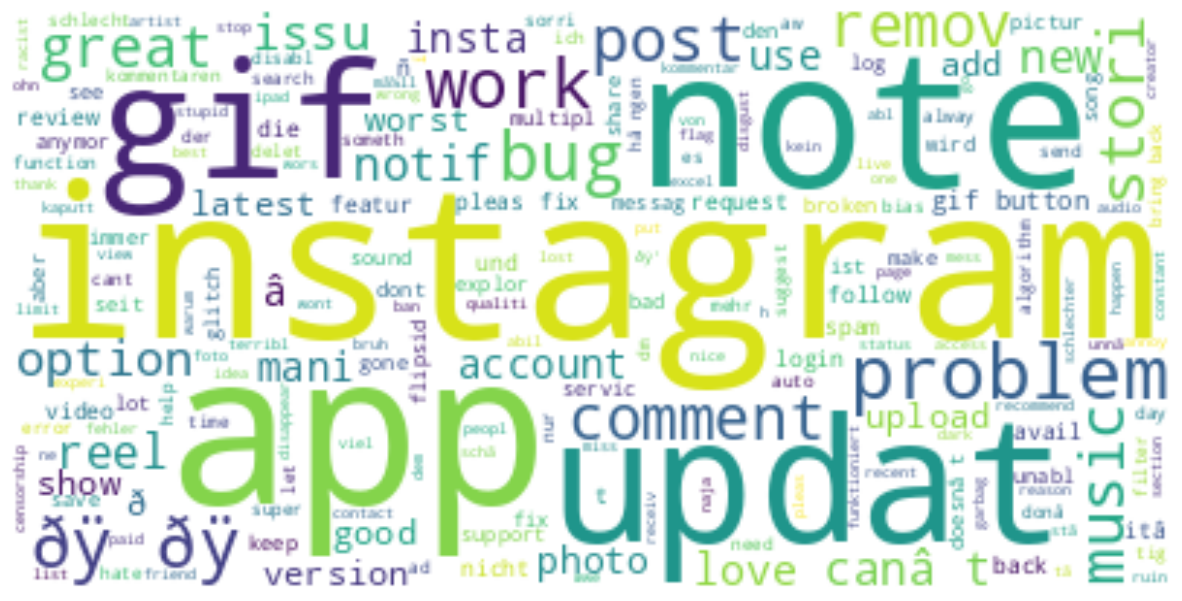

In [23]:
text = " ".join(i for i in data.title)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [24]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["title"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["title"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["title"]]
print(data.head())

                                               title  score  Positive  \
0                            list friend weird order      1     0.464   
1                                    great companion      4     0.804   
2      instagram fehler verbesserung dringend nã¶tig      1     0.000   
3                                   hã¤sslich layout      1     0.000   
4  instagram absolut mã¼ll geworden sorri aber es...      1     0.000   

   Negative  Neutral  
0     0.246    0.290  
1     0.000    0.196  
2     0.000    1.000  
3     0.000    1.000  
4     0.231    0.769  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


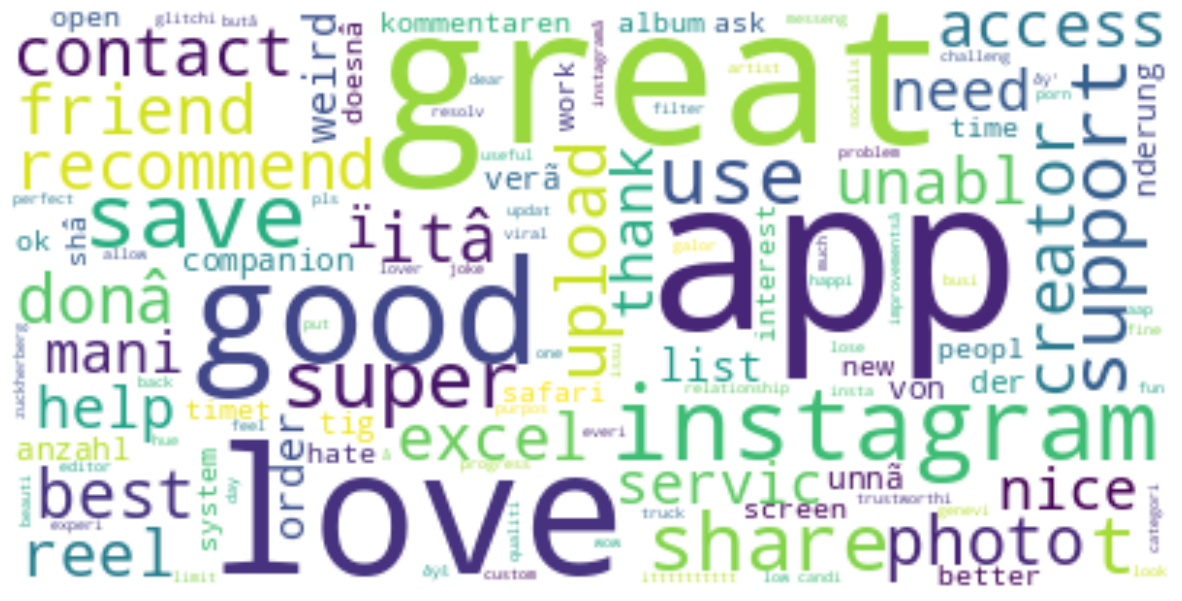

In [25]:
positive =' '.join([i for i in data['title'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

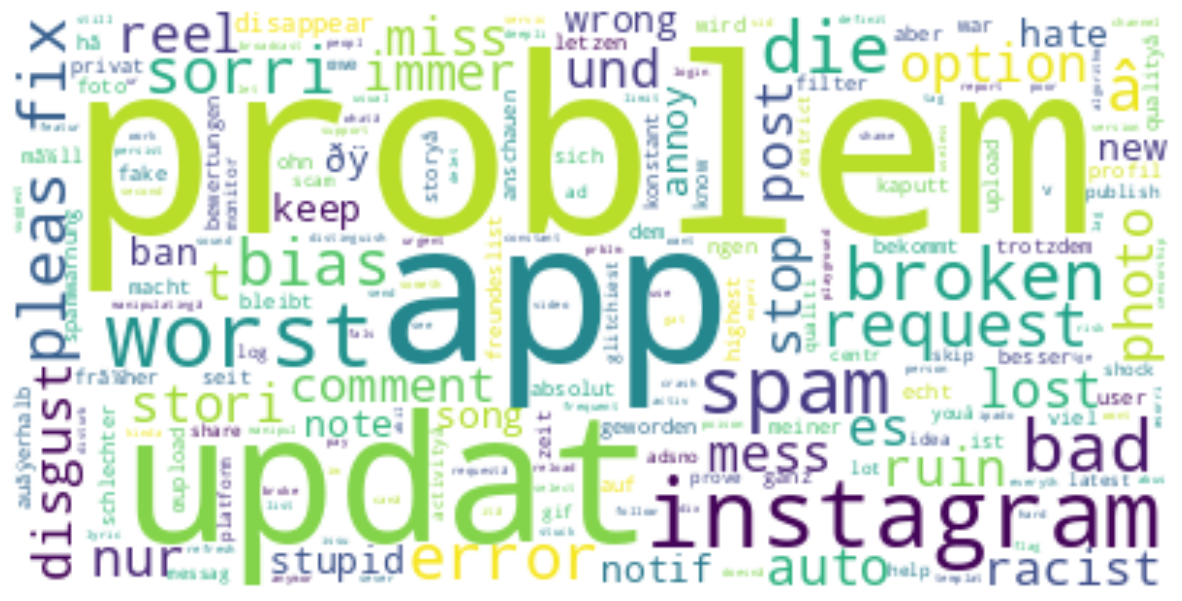

In [26]:
negative =' '.join([i for i in data['title'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
pip install pandas sqlalchemy sqlite3 nltk wordcloud matplotlib plotly


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


# **SQL Queries on both TikTok and Instagram data**



1.   General look inside the database



In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('/content/my_database.db')
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

print("Tables in the database:")
print(tables)


Tables in the database:
             name
0     tiktok_data
1  instagram_data


In [ ]:
table_name = 'tiktok_data'
data = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)

print(f"Preview of data from {table_name}:")
print(data)


Preview of data from tiktok_data:
                                             content  score  Positive  \
0                                               word      5     0.000   
1                                  great fun app far      5     0.787   
2  app would get higher rate liter cant sign seco...      1     0.000   
3             wish could give  percent rate love 💕 😘      5     0.633   
4                                      pictur record      5     0.000   

   Negative  Neutral  
0      0.00    1.000  
1      0.00    0.213  
2      0.07    0.930  
3      0.00    0.367  
4      0.00    1.000  


In [ ]:
# Replace 'table_name' with the actual table name
table_name = 'instagram_data'
data = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 5;", conn)

print(f"Preview of data from {table_name}:")
print(data)


Preview of data from instagram_data:
                                               title  score  Positive  \
0                            list friend weird order      1     0.464   
1                                    great companion      4     0.804   
2      instagram fehler verbesserung dringend nã¶tig      1     0.000   
3                                   hã¤sslich layout      1     0.000   
4  instagram absolut mã¼ll geworden sorri aber es...      1     0.000   

   Negative  Neutral  
0     0.246    0.290  
1     0.000    0.196  
2     0.000    1.000  
3     0.000    1.000  
4     0.231    0.769  


2.   1st Query :Top 5 Most Positive Reviews from Both Platforms

In [50]:
conn = sqlite3.connect('my_database.db')

sql_query = """
SELECT
    platform,
    AVG(Positive) AS AvgPositive,
    AVG(Negative) AS AvgNegative,
    AVG(Neutral) AS AvgNeutral
FROM (
    SELECT 'TikTok' AS platform, content, Positive, Negative, Neutral
    FROM tiktok_data
    UNION ALL
    SELECT 'Instagram' AS platform, title AS content, Positive, Negative, Neutral
    FROM instagram_data
) AS combined_data
GROUP BY platform;
"""


df_sentiment_summary = pd.read_sql_query(sql_query, conn)

print(df_sentiment_summary)

conn.close()


    platform  AvgPositive  AvgNegative  AvgNeutral
0  Instagram     0.094298     0.108494    0.781204
1     TikTok     0.434042     0.037906    0.509645


2.   2nd Query : Count of Reviews by Platform and Score

In [38]:
conn = sqlite3.connect('my_database.db')

sql_query = """
SELECT
    platform,
    score,
    COUNT(*) AS ReviewCount
FROM (
    SELECT 'TikTok' AS platform, score
    FROM tiktok_data
    UNION ALL
    SELECT 'Instagram' AS platform, score
    FROM instagram_data
) AS combined_data
GROUP BY platform, score
ORDER BY platform, score;
"""

df_sentiment_summary = pd.read_sql_query(sql_query, conn)

print(df_sentiment_summary)

conn.close()


    platform  score  ReviewCount
0  Instagram      1          264
1  Instagram      2           54
2  Instagram      3           56
3  Instagram      4           33
4  Instagram      5           93
5     TikTok      1        61925
6     TikTok      2        13179
7     TikTok      3        18616
8     TikTok      4        27664
9     TikTok      5       338872


3.   3rd Query : Platform with the Most Positive Reviews

In [40]:
conn = sqlite3.connect('my_database.db')

sql_query = """
SELECT
    platform,
    COUNT(*) AS PositiveReviewCount
FROM (
    SELECT 'TikTok' AS platform, content, Positive
    FROM tiktok_data
    WHERE Positive > Negative
    UNION ALL
    SELECT 'Instagram' AS platform, title AS content, Positive
    FROM instagram_data
    WHERE Positive > Negative
) AS positive_reviews
GROUP BY platform
ORDER BY PositiveReviewCount DESC
LIMIT 1;
"""

df_sentiment_summary = pd.read_sql_query(sql_query, conn)

print(df_sentiment_summary)

conn.close()


  platform  PositiveReviewCount
0   TikTok               271818


4.   4th Query : Combined Word Frequency for Positive Reviews

In [41]:
conn = sqlite3.connect('my_database.db')

sql_query = """
SELECT
    platform,
    content
FROM (
    SELECT 'TikTok' AS platform, content
    FROM tiktok_data
    WHERE Positive > Negative
    UNION ALL
    SELECT 'Instagram' AS platform, title AS content
    FROM instagram_data
    WHERE Positive > Negative
) AS positive_reviews;
"""

df_sentiment_summary = pd.read_sql_query(sql_query, conn)

print(df_sentiment_summary)

conn.close()


         platform                                    content
0          TikTok                          great fun app far
1          TikTok     wish could give  percent rate love 💕 😘
2          TikTok                              love amaz app
3          TikTok                               love tik tok
4          TikTok                                       love
...           ...                                        ...
271880  Instagram               good app low qualiti creator
271881  Instagram                         love app everi day
271882  Instagram  itâ€™ great app could use improvementsâ€¦
271883  Instagram                                 dear insta
271884  Instagram                     put save categori back

[271885 rows x 2 columns]


4.   4th Query : Combined Word Frequency for Positive Reviews

In [42]:
conn = sqlite3.connect('my_database.db')

sql_query = """
SELECT
    platform,
    COUNT(*) AS TotalReviews,
    SUM(CASE WHEN Neutral > Positive AND Neutral > Negative THEN 1 ELSE 0 END) AS NeutralReviews,
    ROUND((SUM(CASE WHEN Neutral > Positive AND Neutral > Negative THEN 1 ELSE 0 END) * 100.0 / COUNT(*)), 2) AS NeutralPercentage
FROM (
    SELECT 'TikTok' AS platform, Neutral, Positive, Negative
    FROM tiktok_data
    UNION ALL
    SELECT 'Instagram' AS platform, Neutral, Positive, Negative
    FROM instagram_data
) AS combined_data
GROUP BY platform;
"""

df_sentiment_summary = pd.read_sql_query(sql_query, conn)

print(df_sentiment_summary)

conn.close()


    platform  TotalReviews  NeutralReviews  NeutralPercentage
0  Instagram           500             372              74.40
1     TikTok        460256          220080              47.82


5.   5th Query : Comparison of Scores Across Platforms

In [43]:
conn = sqlite3.connect('my_database.db')

sql_query = """
SELECT
    platform,
    AVG(score) AS AvgScore,
    MIN(score) AS MinScore,
    MAX(score) AS MaxScore
FROM (
    SELECT 'TikTok' AS platform, score
    FROM tiktok_data
    UNION ALL
    SELECT 'Instagram' AS platform, score
    FROM instagram_data
) AS combined_data
GROUP BY platform;
"""

df_sentiment_summary = pd.read_sql_query(sql_query, conn)

print(df_sentiment_summary)

conn.close()


    platform  AvgScore  MinScore  MaxScore
0  Instagram  2.274000         1         5
1     TikTok  4.234919         1         5


6.   6th Query : Top Keywords in Negative Reviews

In [44]:
conn = sqlite3.connect('my_database.db')

sql_query = """
SELECT
    platform,
    content
FROM (
    SELECT 'TikTok' AS platform, content
    FROM tiktok_data
    WHERE Negative > Positive
    UNION ALL
    SELECT 'Instagram' AS platform, title AS content
    FROM instagram_data
    WHERE Negative > Positive
) AS negative_reviews;
"""

df_sentiment_summary = pd.read_sql_query(sql_query, conn)

print(df_sentiment_summary)

conn.close()


        platform                                            content
0         TikTok  app would get higher rate liter cant sign seco...
1         TikTok  post view step backward platform  punish casua...
2         TikTok  got ban liter reason guy need stop ban peopl d...
3         TikTok  love tik tok black thing crazi even kill dont ...
4         TikTok                                   lot scammer scam
...          ...                                                ...
33920  Instagram                                  lost abil comment
33921  Instagram                           suggest post ruin experi
33922  Instagram                                         pay artist
33923  Instagram                                             horrid
33924  Instagram                                       broken updat

[33925 rows x 2 columns]


7.   7th Query : Sentiment Distribution by Score

In [45]:
conn = sqlite3.connect('my_database.db')

sql_query = """
SELECT
    platform,
    score,
    AVG(Positive) AS AvgPositive,
    AVG(Negative) AS AvgNegative,
    AVG(Neutral) AS AvgNeutral
FROM (
    SELECT 'TikTok' AS platform, score, Positive, Negative, Neutral
    FROM tiktok_data
    UNION ALL
    SELECT 'Instagram' AS platform, score, Positive, Negative, Neutral
    FROM instagram_data
) AS combined_data
GROUP BY platform, score
ORDER BY platform, score;
"""

df_sentiment_summary = pd.read_sql_query(sql_query, conn)

print(df_sentiment_summary)

conn.close()


    platform  score  AvgPositive  AvgNegative  AvgNeutral
0  Instagram      1     0.038636     0.139564    0.814220
1  Instagram      2     0.045389     0.140204    0.814389
2  Instagram      3     0.130036     0.075232    0.759018
3  Instagram      4     0.124727     0.053879    0.791091
4  Instagram      5     0.248387     0.041290    0.678065
5     TikTok      1     0.186327     0.132980    0.665030
6     TikTok      2     0.225407     0.086512    0.666764
7     TikTok      3     0.306169     0.071553    0.601759
8     TikTok      4     0.411529     0.047382    0.522944
9     TikTok      5     0.496286     0.016020    0.468994


# **AI model **

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-29-ee18bbb2c325>:30: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



              precision    recall  f1-score   support

    Negative       0.65      0.43      0.51     15082
     Neutral       0.21      0.00      0.00      3689
    Positive       0.86      0.97      0.91     73281

    accuracy                           0.84     92052
   macro avg       0.58      0.46      0.48     92052
weighted avg       0.80      0.84      0.81     92052

                                             content  score Sentiment  \
0                                               word      5  Positive   
1                                  great fun app far      5  Positive   
2  app would get higher rate liter cant sign seco...      1  Negative   
3             wish could give  percent rate love 💕 😘      5  Positive   
4                                      pictur record      5  Positive   

  Predicted Sentiment  
0            Positive  
1            Positive  
2            Negative  
3            Positive  
4            Positive  


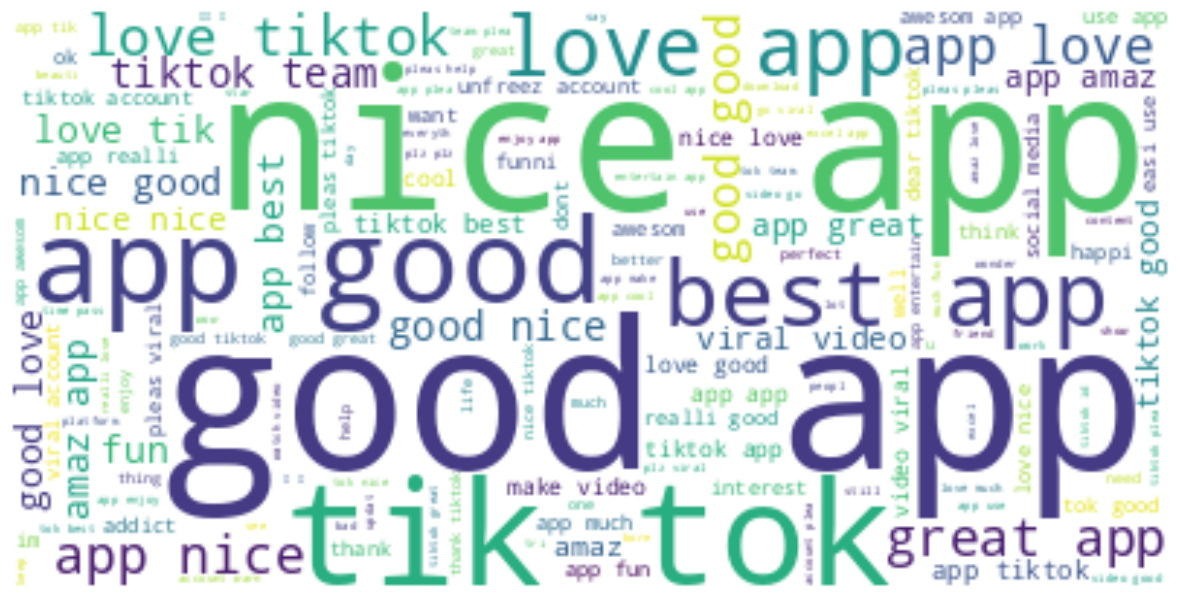

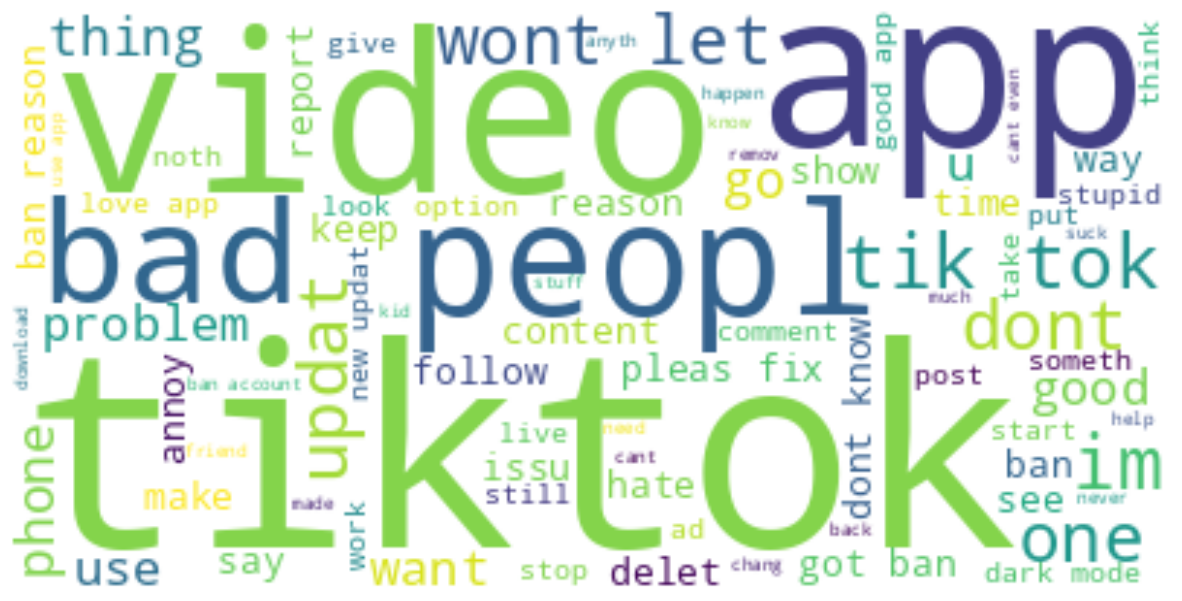

In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# we downloaded the necessary NLTK resources
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopwords = set(nltk.corpus.stopwords.words('english'))

# we cleaned text function
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    return " ".join(text)

# Load and preprocess TikTok data
data = pd.read_csv('/content/drive/MyDrive/tiktok_google_play_reviews.csv')
data = data[["content", "score"]].dropna()
data["content"] = data["content"].apply(clean)

# Assign sentiment labels based on scores
def sentiment_label(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

data['Sentiment'] = data['score'].apply(sentiment_label)

# Prepare data for model training
X = data['content']
y = data['Sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Predict sentiments for the entire dataset
data['Predicted Sentiment'] = model.predict(tfidf.transform(data['content']))

# Display the updated DataFrame
print(data[['content', 'score', 'Sentiment', 'Predicted Sentiment']].head())

# Generate a word cloud for positive reviews
positive_reviews = " ".join(data["content"][data["Predicted Sentiment"] == "Positive"])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positive_reviews)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Generate a word cloud for negative reviews
negative_reviews = " ".join(data["content"][data["Predicted Sentiment"] == "Negative"])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(negative_reviews)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
# Loading and Processing TikTok dataset
tiktok_data = pd.read_csv('/content/drive/MyDrive/tiktok_google_play_reviews.csv')
tiktok_data = tiktok_data[["content", "score"]].dropna()
tiktok_data["content"] = tiktok_data["content"].apply(clean)

# Predict sentiments for TikTok dataset
tiktok_data['Predicted Sentiment'] = model.predict(tfidf.transform(tiktok_data['content']))

# Loading and Processing Instagram dataset
instagram_data = pd.read_csv('/content/appstore_instagram_reviews_anonymized.csv')
instagram_data = instagram_data[["title", "score"]].dropna()
instagram_data["title"] = instagram_data["title"].apply(clean)

# Predict sentiments for Instagram dataset
instagram_data['Sentiment'] = instagram_data['score'].apply(sentiment_label)
instagram_data['Predicted Sentiment'] = model.predict(tfidf.transform(instagram_data['title']))

# Print the processed data
print("TikTok Dataset Sample:")
print(tiktok_data[['content', 'score', 'Predicted Sentiment']].head())

print("\nInstagram Dataset Sample:")
print(instagram_data[['title', 'score', 'Predicted Sentiment']].head())


<ipython-input-31-27e2b7a30f8e>:2: DtypeWarning:

Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.



TikTok Dataset Sample:
                                             content  score  \
0                                               word      5   
1                                  great fun app far      5   
2  app would get higher rate liter cant sign seco...      1   
3             wish could give  percent rate love 💕 😘      5   
4                                      pictur record      5   

  Predicted Sentiment  
0            Positive  
1            Positive  
2            Negative  
3            Positive  
4            Positive  

Instagram Dataset Sample:
                                               title  score  \
0                            list friend weird order      1   
1                                    great companion      4   
2      instagram fehler verbesserung dringend nã¶tig      1   
3                                   hã¤sslich layout      1   
4  instagram absolut mã¼ll geworden sorri aber es...      1   

  Predicted Sentiment  
0            Positive  
